In [1]:
import numpy as np
import pandas as pd

import seaborn as sns 
from matplotlib import pyplot as plt

from scipy.stats import boxcox

from warnings import filterwarnings

filterwarnings("ignore")



Time Series podem exibir vários padrões como sazonalidade, tendência e ciclos, podemos resumir esses três em tendência-ciclo (trend-cycle) ou apenas tendência e a sazonalidade.


Ao decompor uma série temporal, às vezes é útil primeiro transformar ou ajustar a série para tornar a decomposição (e posterior análise) o mais simples possível. Então começaremos discutindo transformações e ajustes.


E a decomposição é a extração desses componentes de uma série temporal.


### 1.0. Calendar adjustments

Muitas das variações dos dados podem ser por causa de efeitos sazonais, nestes casos é mais fácil remover a sazonalidade antes de fazer quaisquer futuras análises.


Trecho diretamente traduzido do livro:


"*Por exemplo, se você estiver estudando o total de vendas mensais em uma loja de varejo, haverá variação entre os meses simplesmente por causa dos diferentes números de dias de negociação em cada mês, além da variação sazonal ao longo do ano. É fácil remover essa variação calculando as vendas médias por dia de negociação em cada mês, em vez do total de vendas do mês. Em seguida, removemos efetivamente a variação do calendário.*".


Infelizmente o livro não tem nenhum exemplo deste, então aqui vai a minha interpretação.


Baseado neste trecho: "É fácil remover essa variação calculando as vendas médias por dia de negociação em cada mês, em vez do total de vendas do mês", se seguirmos essa afirmação teríamos um dataset de médias de vendas e não o total de vendas, nesse caso se utilizar esse dataset para o modelo de time series estamos prevendo médias e não o total de vendas, isso deve ser abordado seguindo as técnicas apresentadas do capítulo 1 para saber se é isso mesmo que iremos prever.


Abaixo tem um exemplo a fim de minimizar a sazonalidade fazendo um resample dos dados com pandas.


In [13]:
df = pd.read_csv("../data/vic_elec.csv", index_col=[0])

df["Time"] = pd.to_datetime(df["Time"])

<Axes: xlabel='Time'>

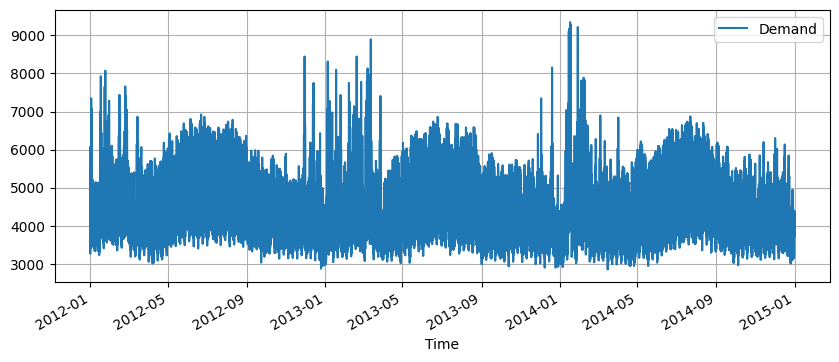

In [17]:
df.plot(x="Time", y="Demand", figsize=(10,4), grid=2)

In [31]:
df.head(24 * 2)

,Time,Demand,Temperature,Date,Holiday
1,2012-01-01 00:00:00,4382.825174,21.40,2012-01-01,True
2,2012-01-01 00:30:00,4263.365526,21.05,2012-01-01,True
3,2012-01-01 01:00:00,4048.966046,20.70,2012-01-01,True
4,2012-01-01 01:30:00,3877.563330,20.55,2012-01-01,True
5,2012-01-01 02:00:00,4036.229746,20.40,2012-01-01,True
6,2012-01-01 02:30:00,3865.597244,20.25,2012-01-01,True
7,2012-01-01 03:00:00,3694.097664,20.10,2012-01-01,True
8,2012-01-01 03:30:00,3561.623686,19.60,2012-01-01,True
9,2012-01-01 04:00:00,3433.035352,19.10,2012-01-01,True
10,2012-01-01 04:30:00,3359.468000,18.95,2012-01-01,True


Nesse caso é a temperatura média por dia, levando em conta que os dados são por 30 ~ 30 minutos.

Posso fazer um resample médio por dia a fim de minimizar a sazonalidade, mas estaria prevendo média se fosse usar esse dataset.

Time
2012-02-23    5209.682536
2012-02-08    4764.265701
2013-03-12    6488.348204
2013-06-01    4380.363108
2013-01-01    3664.625851
Name: Demand, dtype: float64


<Axes: xlabel='Time'>

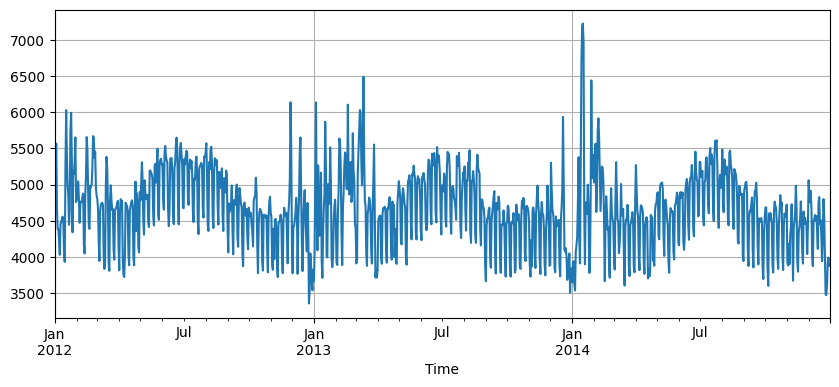

In [28]:
mean_resample_serie = df.set_index("Time")["Demand"].resample("D").mean()
print(mean_resample_serie.sample(5))

mean_resample_serie.plot(figsize=(10,4), grid=2)

Entretanto, a soma total ("""o total de vendas""") também ficou com a mesma sazonalidade, apenas em uma escala diferente dado a fórmula da média que é apenas uma reescala.

Time
2012-01-03    267098.605388
2014-11-21    215411.375356
2013-06-12    256449.083954
2014-05-20    224377.063876
2013-11-19    228398.096374
Name: Demand, dtype: float64


<Axes: xlabel='Time'>

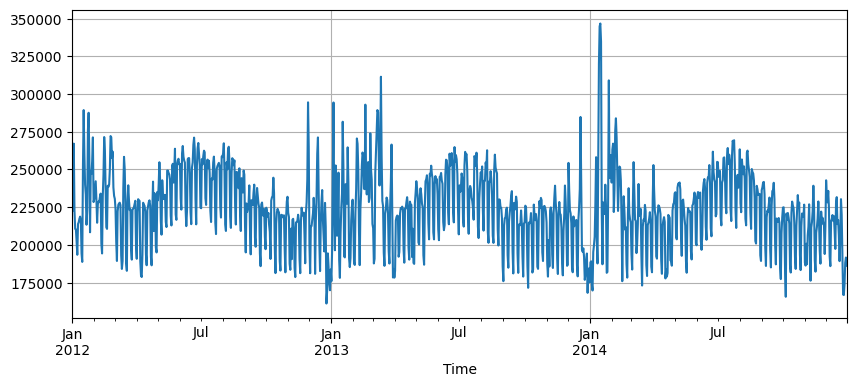

In [32]:
total_resample_serie = df.set_index("Time")["Demand"].resample("D").sum()
print(total_resample_serie.sample(5))

total_resample_serie.plot(figsize=(10,4), grid=2)

Mas, aparentemente reduziu um pouco os picos. Essa redução da sazonalidade fica bem clara quando mudamos de dia para semana.

Time
2012-04-15    1.475847e+06
2012-01-15    1.463857e+06
2013-01-06    1.509435e+06
2012-09-30    1.522917e+06
2012-11-18    1.453558e+06
Name: Demand, dtype: float64


<Axes: xlabel='Time'>

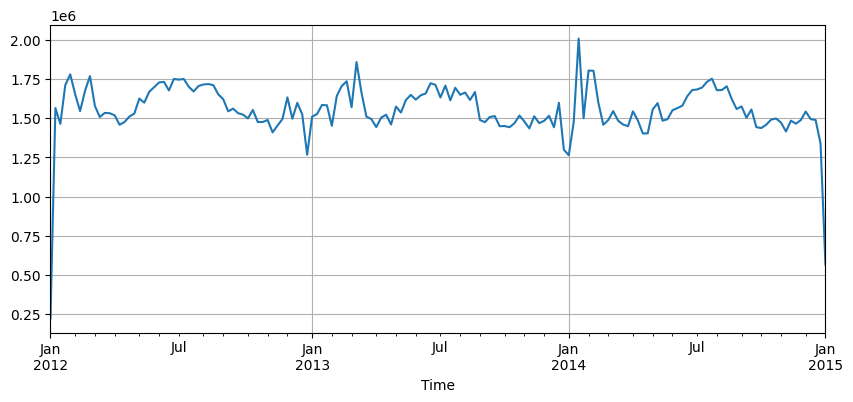

In [34]:
total_weekly_resample_serie = df.set_index("Time")["Demand"].resample("W").sum()
print(total_weekly_resample_serie.sample(5))

total_weekly_resample_serie.plot(figsize=(10,4), grid=2)

### 2.0. Population adjustments

Esse ajuste é para reduzir o efeito populacional nos dados.

Trecho diretamente traduzido do livro:

"*Por exemplo, se você estiver estudando o número de leitos hospitalares em uma determinada região ao longo do tempo, os resultados serão muito mais fáceis de interpretar se você remover os efeitos das mudanças populacionais considerando o número de leitos por mil pessoas. Então você poderá ver se houve aumentos reais no número de leitos ou se os aumentos se devem inteiramente ao aumento populacional.É possível que o número total de leitos aumente, mas o número de leitos por mil pessoas diminua. Isso ocorre quando a população aumenta mais rapidamente do que o número de leitos hospitalares.*".

In [39]:
df = pd.read_csv('../data/global_economy.csv', index_col=[0])

df_aus = df[df['Country'] == 'Australia']
df_aus.reset_index(drop=True, inplace=True)

df_aus['gdp_per_capita'] = df_aus['GDP'] / df_aus['Population']

In [40]:
df_aus.head()

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population,gdp_per_capita
0,Australia,AUS,1960,1.857319e+10,NaN,7.960458,14.061746,12.994452,10276477.0,1807.349784
1,Australia,AUS,1961,1.964834e+10,2.485605,8.142560,15.025080,12.403101,10483000.0,1874.304768
2,Australia,AUS,1962,1.988801e+10,1.296478,8.116545,12.630927,13.943012,10742000.0,1851.424816
3,Australia,AUS,1963,2.150185e+10,6.214278,8.168574,13.834054,13.005886,10950000.0,1963.639079
4,Australia,AUS,1964,2.375854e+10,6.978724,8.402706,13.764495,14.938248,11167000.0,2127.566902




Caso essa razão apareça com um número menor que 1, consequentemente existe mais população do que PIB.


Entretanto se fossemos utilizar esse dataset para treinar uma regressão linear ou outro modelo sem ser um autoregreesivo-like precisamos prever a população também.


In [49]:
GDP = 10000 
POP = 15000

GDP / POP

0.6666666666666666

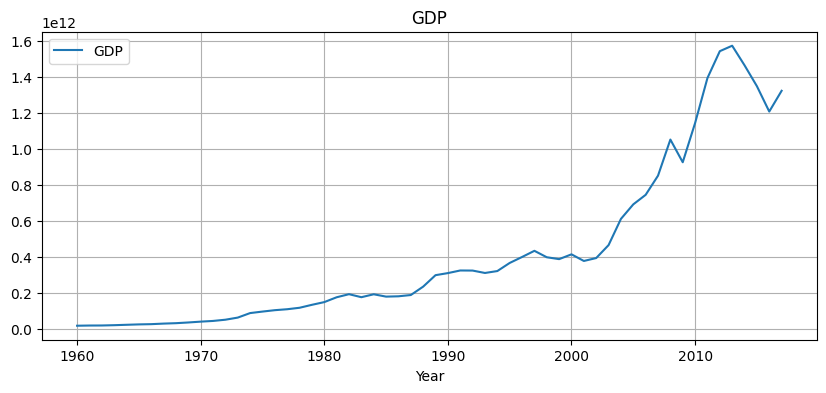

In [45]:
df_aus.plot(
    x='Year', 
    y='GDP', 
    title='GDP',
    grid=2,
    figsize=(10,4)
);

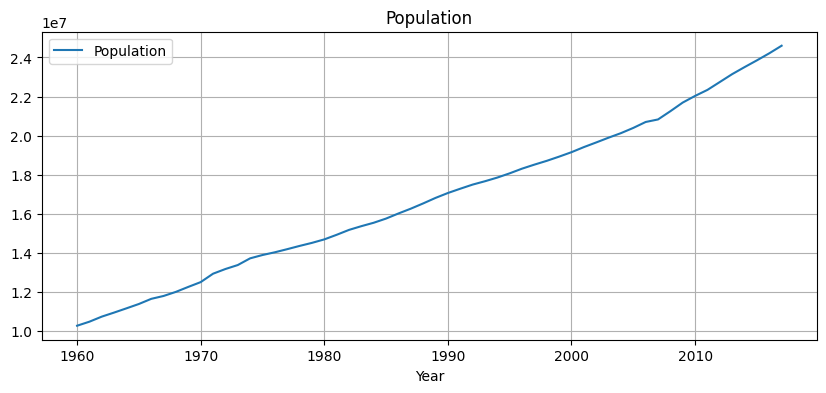

In [44]:
df_aus.plot(
    x='Year', 
    y='Population', 
    title='Population',
    grid=2,
    figsize=(10,4)
);

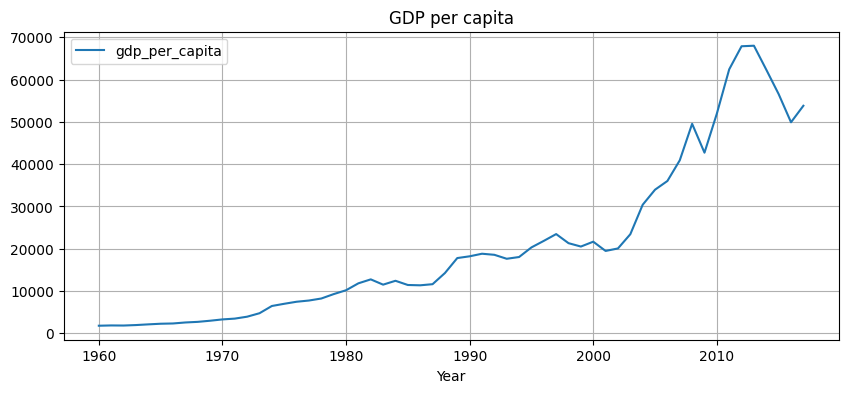

In [42]:
df_aus.plot(
    x='Year', 
    y='gdp_per_capita', 
    title='GDP per capita',
    grid=2,
    figsize=(10,4)
);

### 3.0. Inflation adjustments

No meu ponto de vista essa transformação é muito boa para ser utilizada na análise exploratória pois podemos utilizar ela para validar hipóteses.

Mas, em resumo, dados que são afetados por inflações podem ser ajustados levando em conta o indice da inflação.

In [50]:
df = pd.read_csv('../data/aus_retail.csv', index_col=[0])

df = df[df['Industry'] == "Newspaper and book retailing"]

df['Month'] = pd.to_datetime(df['Month'], format='%Y %b')

df['Year'] = df['Month'].dt.year

df = df[['Year', 'Turnover']].groupby('Year').sum().reset_index()

O CPI é um indicador para balancear o preço x demanda.

In [51]:
df_economy = pd.read_csv('../data/global_economy.csv', index_col=[0])

df_economy = df_economy[df_economy['Code'] == 'AUS']

df = pd.merge(df, df_economy, how='inner', on='Year')

In [55]:
df['Adj_Turnover'] = df['Turnover'] / df['CPI'] #* 100

In [56]:
df.head()

,Year,Turnover,Country,Code,GDP,Growth,CPI,Imports,Exports,Population,Adj_Turnover
0,1982,1263.0,Australia,AUS,1.937217e+11,3.328119,33.428720,16.833742,13.541038,15178000.0,37.781883
1,1983,1799.5,Australia,AUS,1.769864e+11,-2.220144,36.784599,15.627413,13.594733,15369000.0,48.919929
2,1984,2011.3,Australia,AUS,1.931942e+11,4.581140,38.241415,15.009024,13.580218,15544000.0,52.594811
3,1985,2108.7,Australia,AUS,1.801910e+11,5.249206,40.816857,17.309665,15.259988,15758000.0,51.662478
4,1986,2263.3,Australia,AUS,1.819775e+11,4.055135,44.510926,18.086141,15.013742,16018400.0,50.848189


Claramente podemos notar uma queda em 2010 pois o turnover esta diminuindo e o CPI aumentando.

In [57]:
df.tail(15)

,Year,Turnover,Country,Code,GDP,Growth,CPI,Imports,Exports,Population,Adj_Turnover
21,2003,3770.4,Australia,AUS,4.662947e+11,2.985745,82.154006,21.209850,19.103004,19895400.0,45.894293
22,2004,4160.4,Australia,AUS,6.119043e+11,4.001106,84.079084,19.936527,17.219765,20127400.0,49.481985
23,2005,4303.8,Australia,AUS,6.926417e+11,3.190316,86.342352,21.029313,18.285302,20394800.0,49.845758
24,2006,4082.2,Australia,AUS,7.455219e+11,2.834233,89.412071,21.725808,19.908127,20697900.0,45.656028
25,2007,4188.3,Australia,AUS,8.519628e+11,3.777329,91.493236,21.876984,20.230568,20827600.0,45.777154
26,2008,4747.9,Australia,AUS,1.052585e+12,3.657767,95.473465,22.739099,20.188699,21249200.0,49.730048
27,2009,4259.3,Australia,AUS,9.264482e+11,1.922727,97.164412,22.826476,23.038507,21691700.0,43.836009
28,2010,4585.9,Australia,AUS,1.144261e+12,2.052942,100.000000,20.873865,19.842519,22031750.0,45.859000
29,2011,4533.6,Australia,AUS,1.394281e+12,2.451105,103.303850,20.505099,21.472841,22340024.0,43.886070
30,2012,4306.9,Australia,AUS,1.543411e+12,3.891940,105.124870,21.768105,21.518974,22742475.0,40.969373


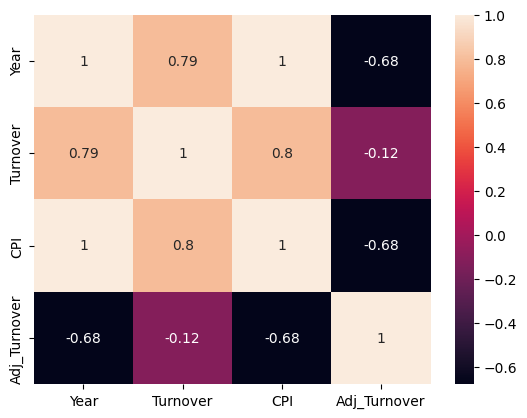

In [69]:
sns.heatmap(df[["Year", "Turnover", "CPI", "Adj_Turnover"]].corr(), annot=True);

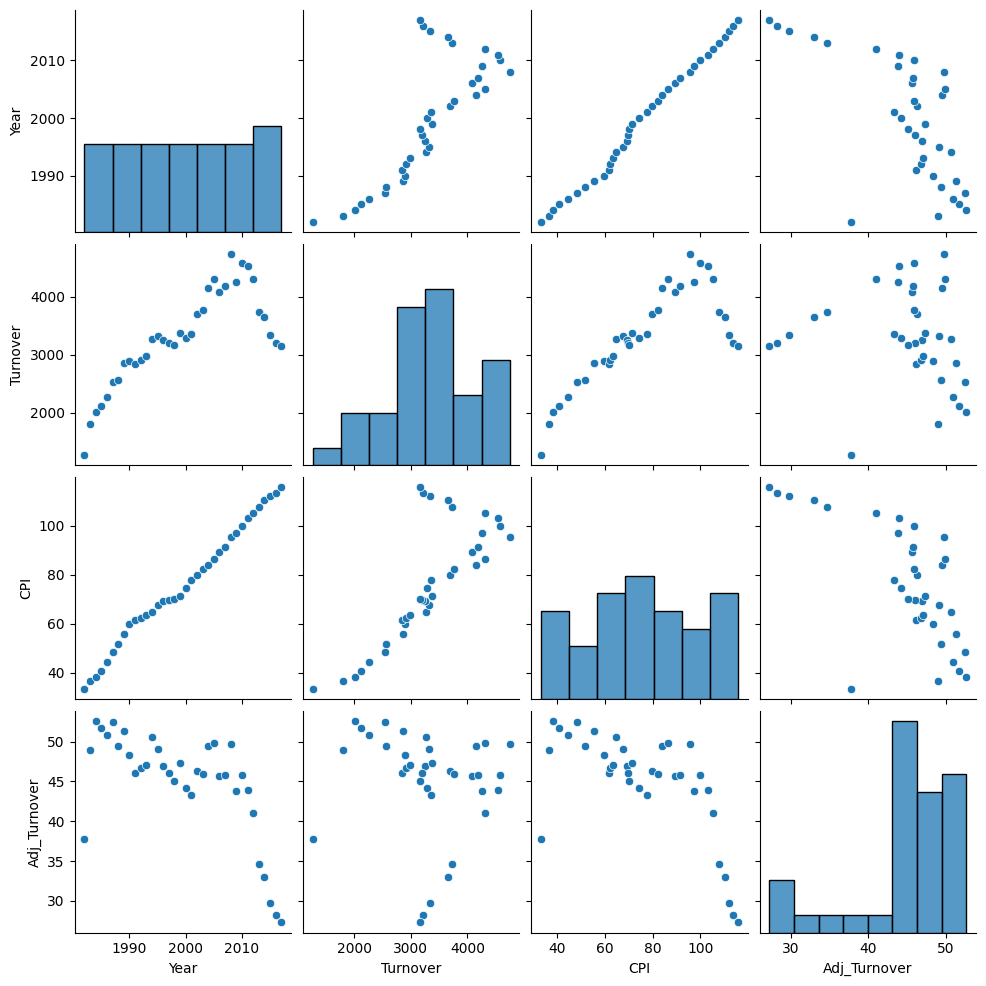

In [70]:
sns.pairplot(df[["Year", "Turnover", "CPI", "Adj_Turnover"]]);

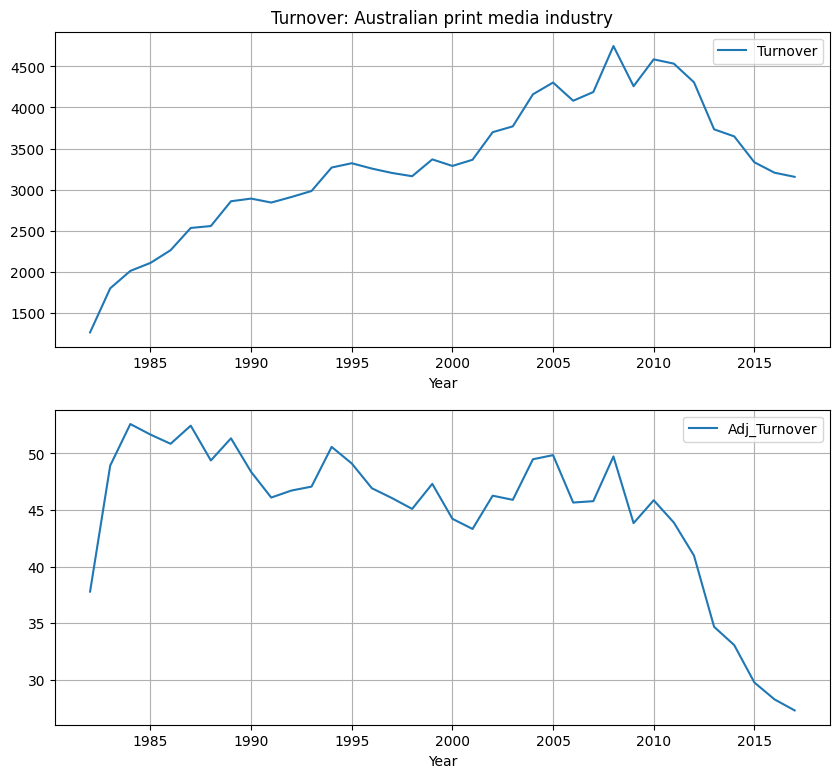

In [58]:
fig, ax = plt.subplots(2, 1, figsize=(10,9))
df.plot(x='Year', y='Turnover', ax=ax[0], grid=2)
df.plot(x='Year', y='Adj_Turnover', ax=ax[1], grid=2);

ax[0].set_title("Turnover: Australian print media industry");

### 4.0. Mathematical Transformations

- Box-Cox.
- Log.
- Cube Root.

In [2]:
df = pd.read_csv('../data/aus_production.csv', index_col=[0])

df['Quarter'] = pd.PeriodIndex(df['Quarter'].apply(lambda x: x.replace(' ', '-')), freq='Q')

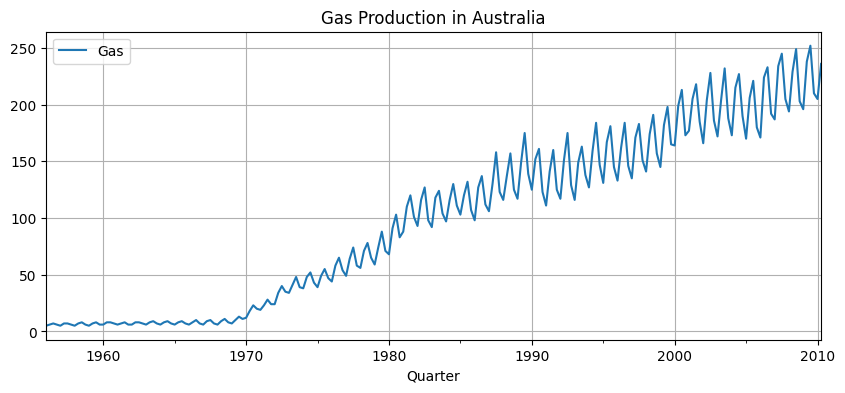

In [3]:
df.set_index('Quarter').plot(y='Gas', grid=2, figsize=(10,4), title='Gas Production in Australia');

In [4]:
lmbda = 0.11

# Se o parametro lambda da função boxcox for null,
# o segundo valor retornado da função é o lambda que maximiza o "log-likelihood".

transform_gas = boxcox(df['Gas'], lmbda=lmbda)

df['transform_gas'] = transform_gas

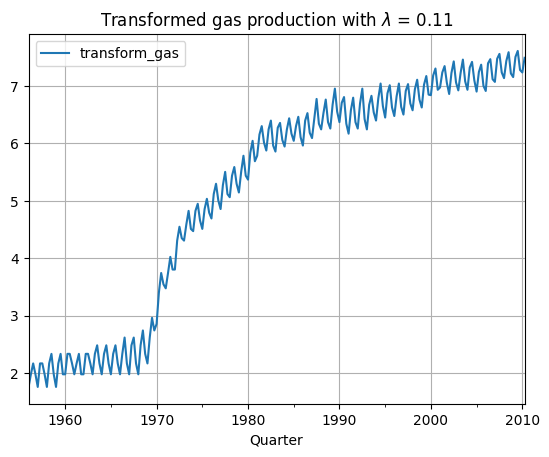

In [5]:
df.plot(x='Quarter', y='transform_gas', grid=2, title=f'Transformed gas production with $\lambda$ = {lmbda}');

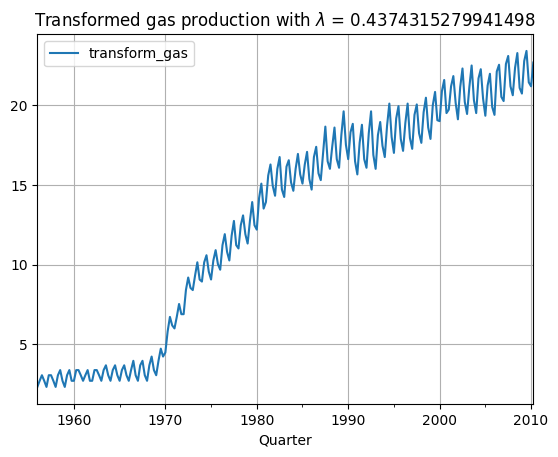

In [9]:
transform_gas, lmbda = boxcox(df['Gas'])

df['transform_gas'] = transform_gas
df.plot(x='Quarter', y='transform_gas', grid=2, title=f'Transformed gas production with $\lambda$ = {lmbda}');